### Machine Learning / Test Estadísticos II: Covarianza y correlación - Pair Programming

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.
1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?



2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.
3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.
4. Guardad la gráfica del heatmap.

In [2]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0)

1. La covarianza nos dice si las variables seleccionadas varian en la misma dirección, en una escala de 0 - 1. Si tienen un efecto entre si mismas, será positiva. (Aumenta una, aumenta la otra.) De lo contrario, será negativa 

    Sin embargo la correlación va un poquito mas allá y nos dice también el grado o la fuerza que tiene esa relación, en este caso en una escala de -1 - 1. Nos indica si existe esta relación y la fuerza. 

In [3]:
# Calculamos la correlacion de Pearson con el metodo .corr() que luego 
# pasaremos a sns para construir nuestro mapa de calor y que así nos sea más visual
# para realizar un análisis. 
matriz_correlacion = df.corr()
matriz_correlacion 

,final_weight,education_yrs,capital_gain,capital_lost,hours_week,salary
final_weight,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.008418
education_yrs,-0.043159,1.000000,0.122627,0.079932,0.148127,0.288938
capital_gain,0.000437,0.122627,1.000000,-0.031614,0.078409,0.189745
capital_lost,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.137224
hours_week,-0.018770,0.148127,0.078409,0.054256,1.000000,0.198167
salary,-0.008418,0.288938,0.189745,0.137224,0.198167,1.000000


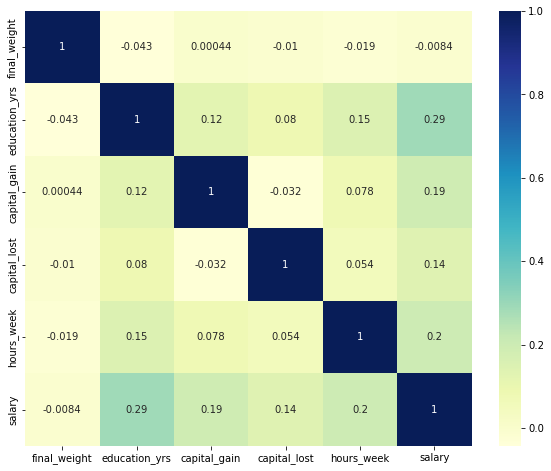

In [4]:
# Creamos el mapa de calor 
sns.heatmap(matriz_correlacion, 
            cmap = "YlGnBu",
           annot = True);
plt.savefig("graficas/heatmap_censo.jpg")

# Interpretacion de los resultados

1. A primera vista, podemos observar que ninguna de nuestras variables, aparentemente, correlaciona especialamente entre sí.

2. La variable salary correlaciona de forma débil pero en el limite con una correlación moderada con la variable education_years(años de educación). Esto no debería sorprendernos si tuvieramos los salarios reales, pero nos impacta un poco que al haber realizado los salarios con un random, correlacione (Que bien lo hace PYTHON!!!)

3. Podríamos decir que las variables que mas se afectan entre sí son hours_week (horas trabajadas por semana) con education_years (años de formación), lo cual tiene mucho sentido (podríamos esperar una correlacion mas alta incluso.) Aún así, el valor esta en 0.15, siendo este valor considerado una correlacion MUY BAJA. 

4. Education_years (Años de formación) también parece correlacionarse de una manera muy leve con capital_gain (capital ganado). De nuevo, esto nos parece más que lógico y volvemos a esperar una correlación mas alta aún (Quizás estos datos se encuentran un poco distorsionados por no haber gestionado aún los outliers)

5. final_weight (censo ponderado?) es, desde luego, la que menos parece correlacionar con ninguna, y es nuestra variable respuesta elegida. 